# EDA

# 1. Import the libraries

In [366]:
from config.warehouse_config import get_db_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from services.eda import EDA
import numpy as np
from model.warehouse import *

# 1.1 DB connection

In [367]:
Session = sessionmaker(bind=get_db_engine())
session = Session()

# 2. Load and clean the data

# 2.1 Get the data from the 'titles' table and load it into a DataFrame

In [368]:
data = pd.read_sql('SELECT * FROM titles', get_db_engine())
data.set_index('id', inplace=True)
print('Number of rows:', data.shape[0])

Number of rows: 25294


# 2.1.1 Raw data


In [369]:
data.head()

,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_certification_id,platform_id
id,,,,,,,,,,,,,
ts299859,Serendipity,SHOW,None,1973,39,1.0,tt8912714,NaN,NaN,NaN,NaN,NaN,1
ts43055,Entertainment Weekly,SHOW,This program -- one of our viewers’ favorites ...,1984,60,1.0,tt7782444,NaN,NaN,4.729,8.5,NaN,1
tm21196,Il Mare,MOVIE,"In the year 1999, a young woman leaves her qua...",2000,105,NaN,tt0282599,7.5,8777.0,10.413,7.5,NaN,1
tm8809,Fight Back to School,MOVIE,Star Chow is about to be kicked out of the Roy...,1991,100,NaN,tt0103045,7.0,4021.0,5.616,6.6,NaN,1
ts39072,Inkigayo,SHOW,The program is a weekly music show that featur...,1998,69,2.0,tt6050846,5.7,9.0,2.154,9.0,NaN,1


# 2.2 Remove rows with null values to clean the data

In [370]:
print('Number of rows:', data.shape[0])

Number of rows: 25294


# 2.2.1 Clean data

In [371]:
data.head()

,title,type,description,release_year,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,age_certification_id,platform_id
id,,,,,,,,,,,,,
ts299859,Serendipity,SHOW,None,1973,39,1.0,tt8912714,NaN,NaN,NaN,NaN,NaN,1
ts43055,Entertainment Weekly,SHOW,This program -- one of our viewers’ favorites ...,1984,60,1.0,tt7782444,NaN,NaN,4.729,8.5,NaN,1
tm21196,Il Mare,MOVIE,"In the year 1999, a young woman leaves her qua...",2000,105,NaN,tt0282599,7.5,8777.0,10.413,7.5,NaN,1
tm8809,Fight Back to School,MOVIE,Star Chow is about to be kicked out of the Roy...,1991,100,NaN,tt0103045,7.0,4021.0,5.616,6.6,NaN,1
ts39072,Inkigayo,SHOW,The program is a weekly music show that featur...,1998,69,2.0,tt6050846,5.7,9.0,2.154,9.0,NaN,1


# 3. Exploratory Data Analysis

# 3.1 Create an instance of the EDA class and analyze the data

In [372]:
data['imdb_score'] = pd.to_numeric(data['imdb_score'], errors='coerce')
data['tmdb_popularity'] = pd.to_numeric(data['tmdb_popularity'], errors='coerce')
data['runtime'] = pd.to_numeric(data['runtime'], errors='coerce')

# 3.1.1 Just numeric data

In [373]:
numeric_data = data.select_dtypes(include=[np.number])  # Esto excluye las columnas no numéricas
correlation_matrix = numeric_data.corr()

# 3.1.2 Correlation matrix

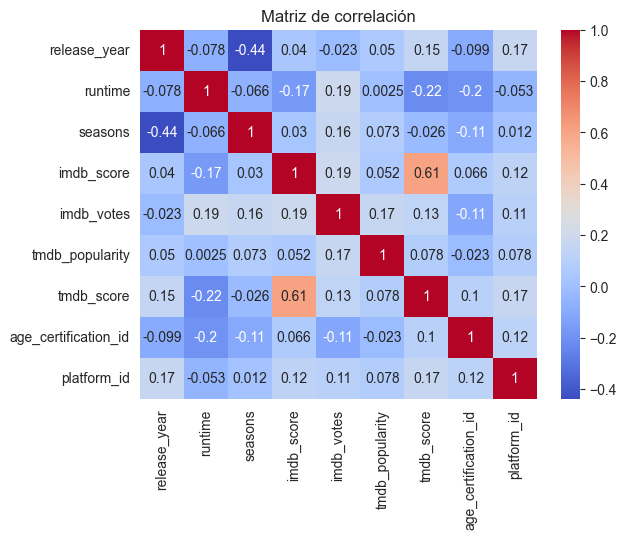

In [374]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# 3.1.3 Scatter plot

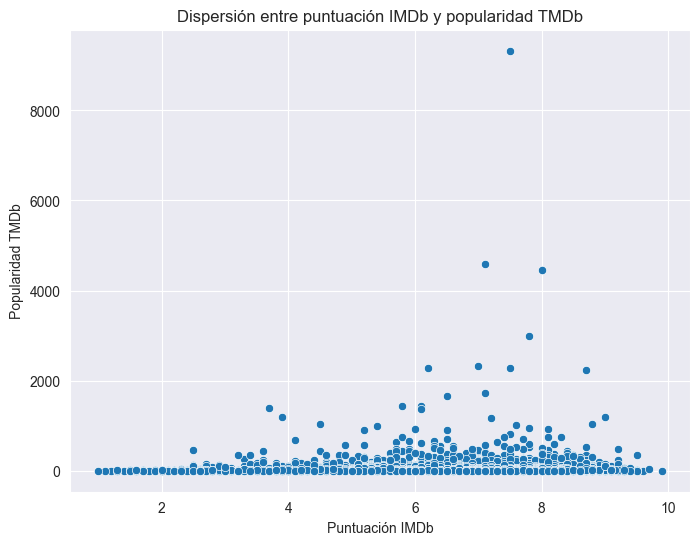

In [375]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='imdb_score', y='tmdb_popularity', data=data)
plt.title('Dispersión entre puntuación IMDb y popularidad TMDb')
plt.xlabel('Puntuación IMDb')
plt.ylabel('Popularidad TMDb')
plt.show()

# 3.1.4 Graph of runtime per tmdb_popularity


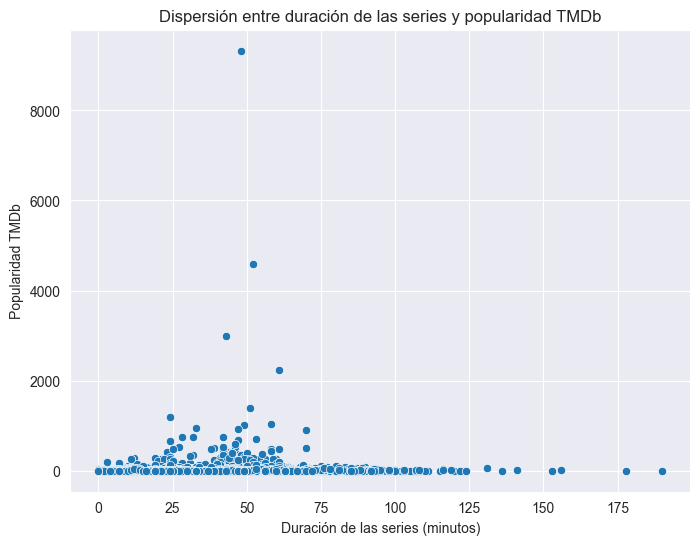

In [376]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime', y='tmdb_popularity', data=data[data['type'] == 'SHOW'])
plt.title('Dispersión entre duración de las series y popularidad TMDb')
plt.xlabel('Duración de las series (minutos)')
plt.ylabel('Popularidad TMDb')
plt.show()

# 3.1.5 Graph of runtime per imdb_score


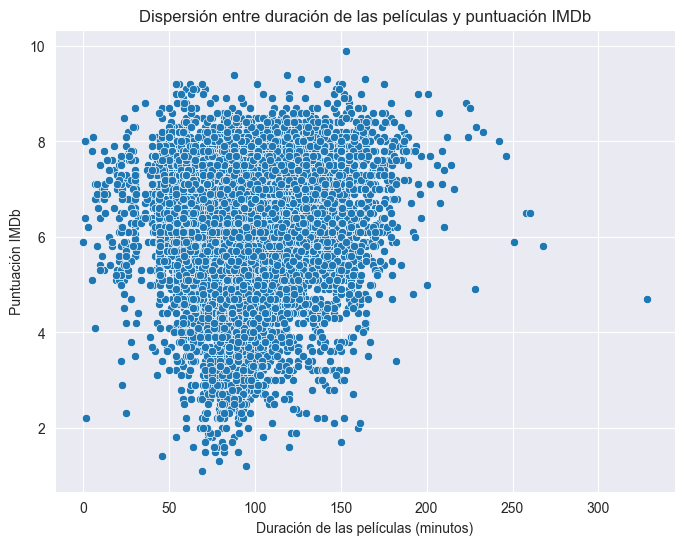

In [377]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=data[data['type'] == 'MOVIE'])
plt.title('Dispersión entre duración de las películas y puntuación IMDb')
plt.xlabel('Duración de las películas (minutos)')
plt.ylabel('Puntuación IMDb')
plt.show()

# 3.1.6 Graph of titles per year


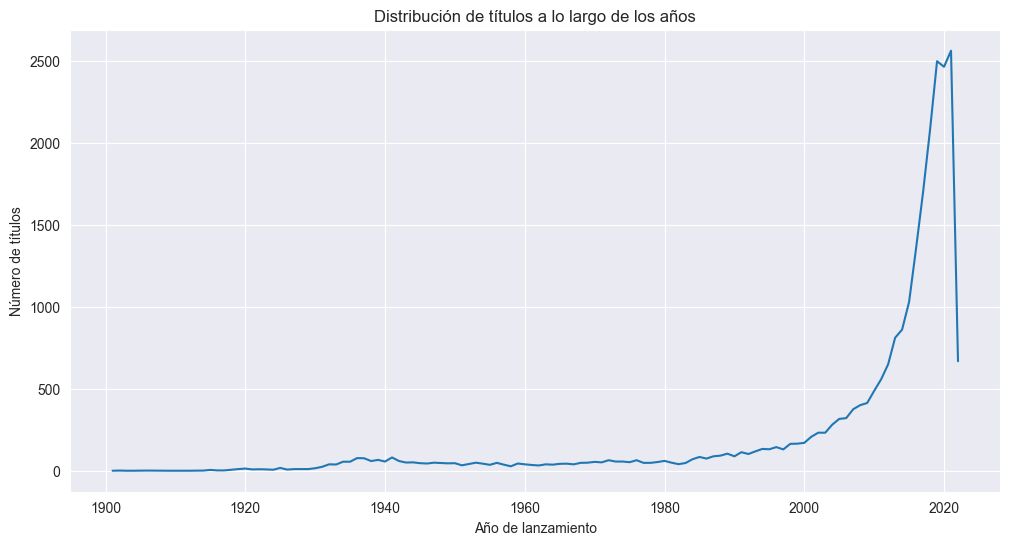

In [378]:
plt.figure(figsize=(12, 6))
titles_per_year = data.groupby('release_year').size()
titles_per_year.plot(kind='line')
plt.title('Distribución de títulos a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de títulos')
plt.show()

## Análisis de décadas


# 3.1.7 Graph of titles per decade


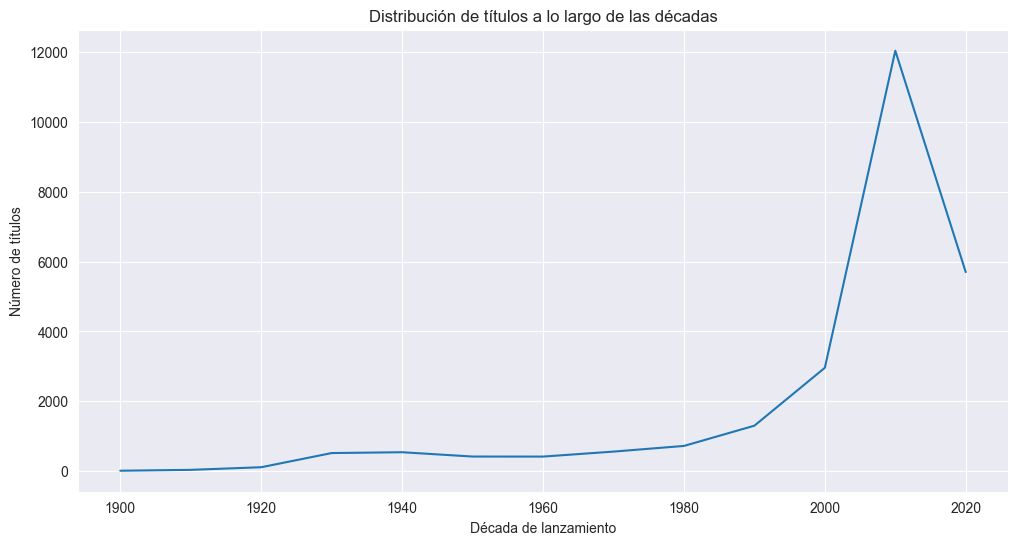

In [379]:
plt.figure(figsize=(12, 6))
data['release_decade'] = data['release_year'] // 10 * 10
titles_per_decade = data.groupby('release_decade').size()
titles_per_decade.plot(kind='line')
plt.title('Distribución de títulos a lo largo de las décadas')
plt.xlabel('Década de lanzamiento')
plt.ylabel('Número de títulos')
plt.show()

# 3.1.8 Graph of titles per type


In [380]:
query = session.query(
    Titles.imdb_score, 
    Titles.tmdb_popularity, 
    Genres.name.label('genre_name')
).join(
    TitleGenres, Titles.id == TitleGenres.c.title_id
).join(
    Genres, TitleGenres.c.genre_id == Genres.id
)

# Convertir la consulta en un DataFrame de pandas
genre_data = pd.read_sql(query.statement, session.bind)
genre_data

,imdb_score,tmdb_popularity,genre_name
0,NaN,4.729,reality
1,7.5,10.413,fantasy
2,7.5,10.413,scifi
3,7.5,10.413,romance
4,7.5,10.413,drama
...,...,...,...
60599,7.7,NaN,drama
60600,3.8,26.005,comedy
60601,7.8,2.289,family
60602,7.8,2.289,animation


<Figure size 1200x600 with 0 Axes>

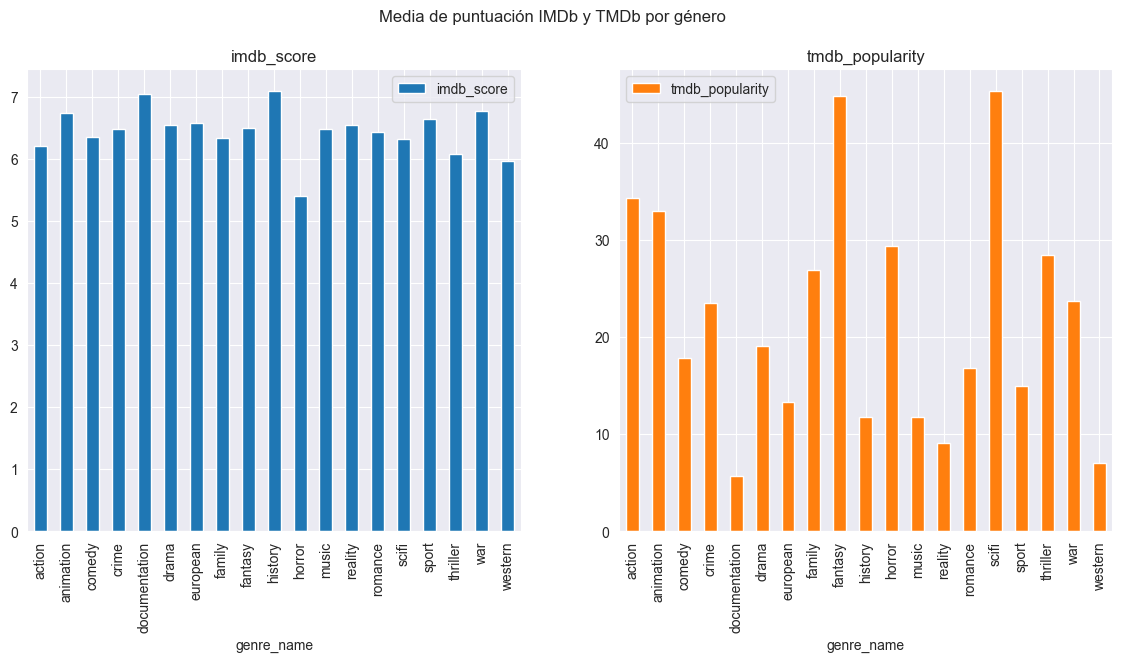

In [381]:
genre_avg_scores = genre_data.groupby('genre_name').agg({
    'imdb_score': 'mean',
    'tmdb_popularity': 'mean'
})

# Average scores per genre
plt.figure(figsize=(12, 6))
genre_avg_scores.plot(kind='bar', subplots=True, layout=(1, 2), figsize=(14, 6), title='Media de puntuación IMDb y TMDb por género')
plt.show()

# 4. Analysis: number of titles per platform

# 4.1 Query & configure data

In [382]:
platform_counts = session.query(Platforms.name, sqlalchemy.func.count(Titles.id)).\
    join(Titles).\
    group_by(Platforms.name).\
    all()


# 4.2 Plot

In [383]:
platform_names = [result[0] for result in platform_counts]
count_titles = [result[1] for result in platform_counts]
platform_names, count_titles

(['HuluTV_Titles.csv',
  'Netflix_Titles.csv',
  'Rakuten_Viki_Titles.csv',
  'Amazon_Prime_Titles.csv',
  'Disney_Plus_Titles.csv',
  'HBOMax_Titles.csv',
  'ParamountTV_Titles.csv'],
 [2197, 5468, 1904, 9786, 1501, 3194, 1244])

# 5. Analysis: average score per genre
## Hypothesis
* Drama and thriller genres: it is expected that the average score of the IMDb is higher than the average score of the TMDb.
* Action and sci-fi: it is expected that the average score of the TMDb is higher than the average score of the IMDb due to the type of audience that uses each platform.
* Comedies and family movies: it is expected that the average score of the TMDb is higher than the average score of the IMDb due to the type of audience that uses each platform.

## 5.1 Query & configure data

In [384]:
from sqlalchemy import func

# Consulta para obtener el promedio de puntuaciones por género
genre_scores = session.query(
    Genres.name,
    func.avg(Titles.imdb_score).label('average_imdb_score'),
    func.avg(Titles.tmdb_score).label('average_tmdb_score')
).select_from(
    Genres
).join(
    TitleGenres, Genres.id == TitleGenres.c.genre_id
).join(
    Titles, Titles.id == TitleGenres.c.title_id
).group_by(
    Genres.name
).all()

genre_scores

[('thriller', 6.080939040788887, 6.283913048420103),
 ('romance', 6.435562898814931, 6.5632512659753965),
 ('documentation', 7.043711750306004, 6.947055500658765),
 ('drama', 6.54369744099827, 6.651498680116939),
 ('music', 6.485227272727269, 6.66630520169851),
 ('comedy', 6.360232388368418, 6.545000870105664),
 ('reality', 6.54175461741425, 7.223987915407863),
 ('war', 6.768823529411765, 6.753419427710838),
 ('crime', 6.4797138314785325, 6.576704151683561),
 ('history', 7.086543778801852, 7.019790891283055),
 ('horror', 5.410645161290321, 5.862862022592779),
 ('western', 5.963132911392407, 5.798711764705884),
 ('action', 6.20946311752763, 6.531352119236139),
 ('european', 6.575508982035924, 6.539868990384607),
 ('sport', 6.650227272727272, 6.697992765273313),
 ('animation', 6.738639551192157, 7.166386613826517),
 ('family', 6.330957602339181, 6.842697119029568),
 ('fantasy', 6.492484599589327, 6.865233523189588),
 ('scifi', 6.316258445945945, 6.766249691230967)]

In [385]:
genre_names = [result[0] for result in genre_scores]
imdb_scores = [result[1] for result in genre_scores]
tmdb_scores = [result[2] for result in genre_scores]

genre_names[:5], imdb_scores[:5], tmdb_scores[:5]

(['thriller', 'romance', 'documentation', 'drama', 'music'],
 [6.080939040788887,
  6.435562898814931,
  7.043711750306004,
  6.54369744099827,
  6.485227272727269],
 [6.283913048420103,
  6.5632512659753965,
  6.947055500658765,
  6.651498680116939,
  6.66630520169851])

## 5.2 Plot

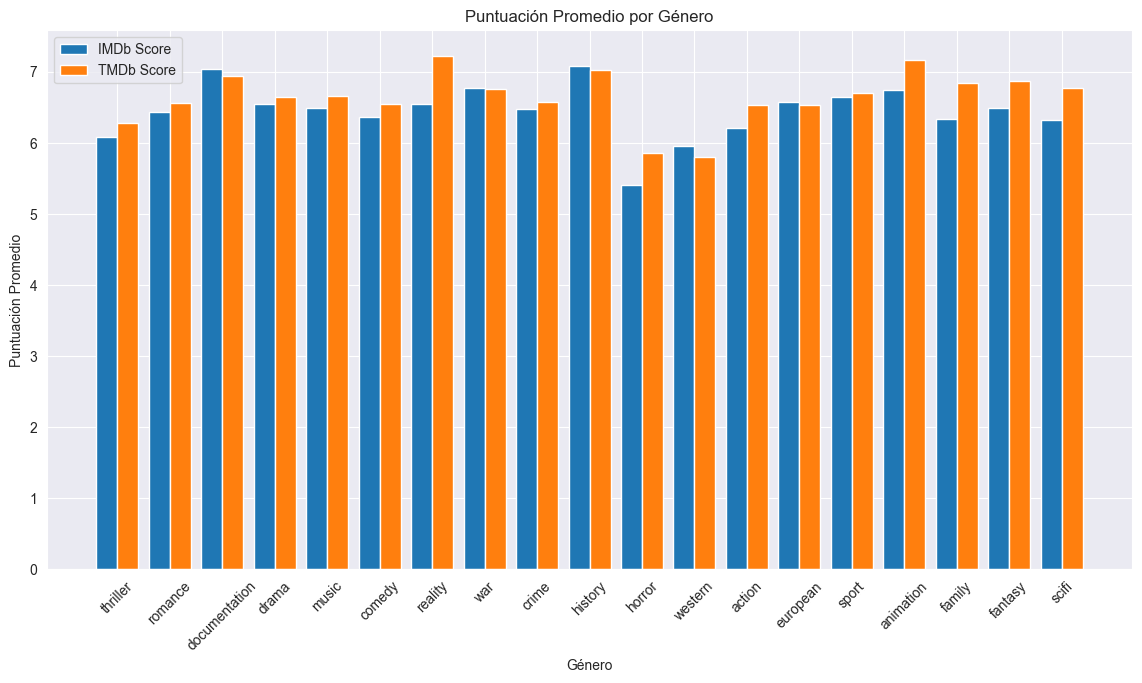

In [386]:
plt.figure(figsize=(14, 7))
x = range(len(genre_names))
plt.bar(x, imdb_scores, width=0.4, label='IMDb Score', align='center')
plt.bar([p + 0.4 for p in x], tmdb_scores, width=0.4, label='TMDb Score', align='center')
plt.xlabel('Género')
plt.ylabel('Puntuación Promedio')
plt.title('Puntuación Promedio por Género')
plt.xticks([p + 0.2 for p in x], genre_names, rotation=45)
plt.legend()
plt.show()


# 5.3 Result analysis
* Thriller movies and dramas don't have the highest scores on any platform.
* Action and sci-fi do have higher scores on TMDb than on IMDb.
* Comedies and family movies have higher scores on TMDb than on IMDb.

# 6. Analysis: title distribution by age certification
## Hypothesis
* General certifications (G, PG):  platforms aim to reach a wider audience so it'd make sense to have more titles for all ages.
* Teen certifications (PG-13): should be one of the most common certifications, where a huge number of blockbusters are designed to reach this audience.
* Adult certifications (R, NC-17): should be the least common certifications, as they are intended for a more specific audience.

## 6.1 Query & configure data

In [387]:
age_certification_counts = session.query(
    AgeCertifications.name,
    func.count(Titles.id)
).join(
    Titles, Titles.age_certification_id == AgeCertifications.id
).group_by(
    AgeCertifications.name
).all()

cert_names = [result[0] for result in age_certification_counts]
cert_counts = [result[1] for result in age_certification_counts]

cert_names[:5], cert_counts[:5]

(['TV-PG', 'TV-Y7', 'PG', 'G', 'TV-Y'], [755, 337, 1576, 951, 300])

## 6.2 Plot

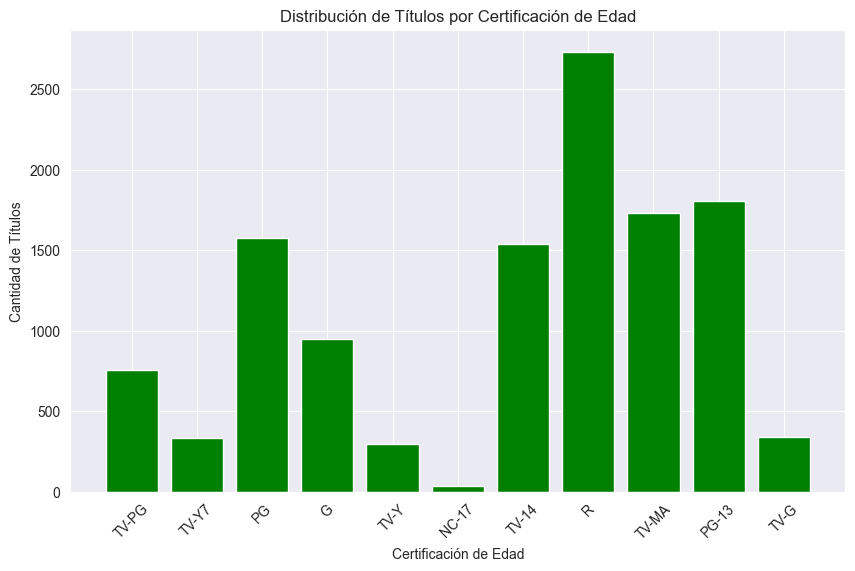

In [388]:
plt.figure(figsize=(10, 6))
plt.bar(cert_names, cert_counts, color='green')
plt.xlabel('Certificación de Edad')
plt.ylabel('Cantidad de Títulos')
plt.title('Distribución de Títulos por Certificación de Edad')
plt.xticks(rotation=45)
plt.show()


# 6.3 Result analysis
* Results are consistent with the hypothesis due to the following:
    * Adult certifications (R, NC-17) are the most common, over 2500 titles.
    * Teen certifications (PG-13) are the second most common.
    * General certifications (G, PG) have the fewest titles.